# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Normalization,BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the Dataset

In [ ]:
# Read the data

merged_data = pd.read_csv('/content/drive/MyDrive/CAPSTONE/Train/Customer_segmentation1.csv')
merged_data.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
0,1.0,0,0,0,1.0,2012,9,28,29,30,0,1,300,0,15.000000,1,0
1,1.0,1,1,1,0.0,2010,12,19,95,89,7,10,1096,1024,83.946237,186,1
2,1.0,0,0,0,6.0,2010,10,3,0,1,0,0,0,217,34.076923,13,2
3,3.0,0,0,0,1.0,2010,11,27,30,28,3,4,751,791,106.857143,7,1
4,1.0,1,1,0,0.0,2009,12,4,64,19,46,10,1504,848,69.117647,34,1


In [ ]:
merged_data.shape

(23820, 17)

# Split the data

In [ ]:
X = merged_data.drop(['RetentionPotential'], axis=1).values
y = merged_data['RetentionPotential'].values

In [ ]:
X.shape

(23820, 16)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random over sampling

In [ ]:
# Print class distribution
print("Original class distribution:", Counter(y_train))

# Instantiate a RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Perform the oversampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Print the new class distribution
print(pd.Series(y_train_resampled).value_counts())


Original class distribution: Counter({1: 15359, 0: 3002, 2: 695})
1    15359
0    15359
2    15359
dtype: int64


## Decision Tree

In [ ]:
# Build the decision tree model
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model1.fit(X_train_resampled, y_train_resampled)

# Evaluate the performance of the model
y_train_pred1 = model1.predict(X_train_resampled)

y_test_pred1 = model1.predict(X_test)


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred1))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred1))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     15359
           1       0.94      0.78      0.85     15359
           2       0.97      1.00      0.99     15359

    accuracy                           0.91     46077
   macro avg       0.91      0.91      0.91     46077
weighted avg       0.91      0.91      0.91     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.46      0.91      0.61       754
           1       0.97      0.76      0.85      3826
           2       0.60      0.88      0.71       184

    accuracy                           0.79      4764
   macro avg       0.68      0.85      0.72      4764
weighted avg       0.88      0.79      0.81      4764



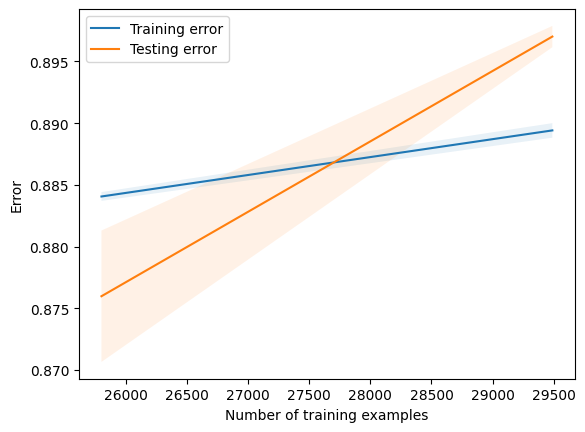

In [ ]:
# Use your actual training set data instead of defining a range of sizes
train_sizes = [0.8, 0.7]

# Compute learning curves with your actual data
train_sizes, train_scores, test_scores = learning_curve(model1, X_train_resampled, y_train_resampled,
                                                        train_sizes=train_sizes,
                                                        cv=5)
# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Testing error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

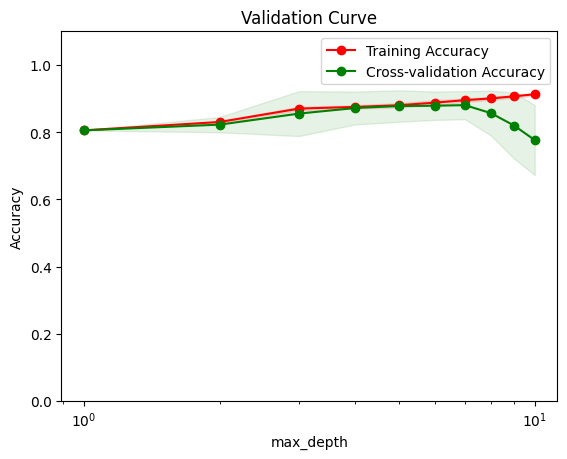

In [ ]:
# Define the hyperparameter values to test
param_range = np.arange(1, 11)

# Plot the validation curve for the max_depth hyperparameter
train_scores, test_scores = validation_curve(model1, X, y, param_name='max_depth', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_mean, 'o-', color='r', label='Training Accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.semilogx(param_range, test_mean, 'o-', color='g', label='Cross-validation Accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.legend(loc='best')
plt.show()

## Hyperparameter tuning

In [ ]:
param = {'max_depth':[5,6,7,10,15],  
         'min_samples_leaf':[10,15,13,20,23,25],
         'min_samples_split':[2,3,4,5],
        'criterion':['gini','entropy','log_loss']}

hyp_model1 = GridSearchCV(model1, param, cv=4 )  
best_dec = hyp_model1.fit(X_train_resampled, y_train_resampled) 
best_dec.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [ ]:
y_train_pred1_hyp = hyp_model1.predict(X_train_resampled)
y_test_pred1_hyp = hyp_model1.predict(X_test)

In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred1_hyp))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred1_hyp))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     15359
           1       0.94      0.84      0.89     15359
           2       0.97      1.00      0.99     15359

    accuracy                           0.93     46077
   macro avg       0.93      0.93      0.93     46077
weighted avg       0.93      0.93      0.93     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.51      0.85      0.64       754
           1       0.96      0.82      0.88      3826
           2       0.63      0.87      0.73       184

    accuracy                           0.83      4764
   macro avg       0.70      0.85      0.75      4764
weighted avg       0.88      0.83      0.84      4764



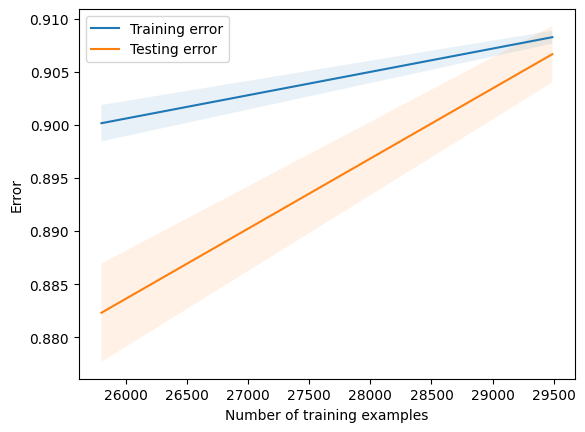

In [ ]:
# Use your actual training set data instead of defining a range of sizes
train_sizes = [0.8, 0.7]

# Compute learning curves with your actual data
train_sizes, train_scores, test_scores = learning_curve(hyp_model1, X_train_resampled, y_train_resampled,
                                                        train_sizes=train_sizes,
                                                        cv=5)
# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Testing error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

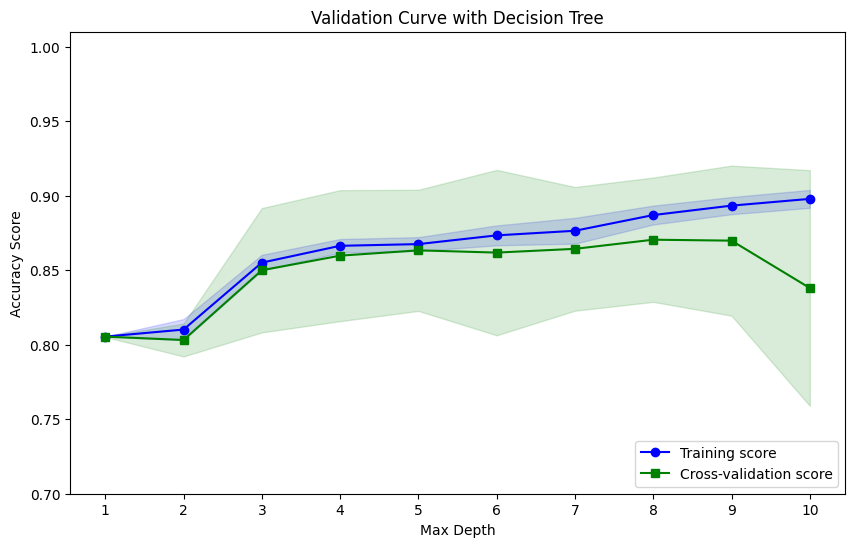

In [ ]:
# Get the best estimator found by GridSearchCV
best_estimator = hyp_model1.best_estimator_

# Create a new DecisionTreeClassifier object with the same parameters as the best estimator
dtc = DecisionTreeClassifier(criterion=best_estimator.criterion, max_depth=best_estimator.max_depth, min_samples_leaf=best_estimator.min_samples_leaf, min_samples_split=best_estimator.min_samples_split)

# Plot the validation curve for the max_depth hyperparameter
train_scores, test_scores = validation_curve(dtc, X, y, param_name='max_depth', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10,6))
plt.title('Validation Curve with Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.ylim(0.7, 1.01)
plt.xticks(param_range)
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, label='Cross-validation score', color='green', marker='s')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.legend(loc='lower right')
plt.show()

## SVC


In [ ]:
# Create SVM model
model2 = SVC(kernel='linear')

# Train SVM model
model2.fit(X_train_resampled, y_train_resampled)

# Evaluate the performance of the model
y_train_pred2 = model2.predict(X_train_resampled)

y_test_pred2 = model2.predict(X_test)

In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred2))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred2))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     15359
           1       0.78      0.62      0.69     15359
           2       0.86      0.84      0.85     15359

    accuracy                           0.78     46077
   macro avg       0.78      0.78      0.77     46077
weighted avg       0.78      0.78      0.77     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.35      0.86      0.49       754
           1       0.96      0.61      0.75      3826
           2       0.31      0.81      0.45       184

    accuracy                           0.66      4764
   macro avg       0.54      0.76      0.56      4764
weighted avg       0.84      0.66      0.70      4764



## Random Forest

In [ ]:
#Create Random Forest model
model3 = RandomForestClassifier()

# Train Random Forest model
model3.fit(X_train_resampled, y_train_resampled)

# Evaluate the performance of the model
y_train_pred3 = model3.predict(X_train_resampled)

y_test_pred3 = model3.predict(X_test)

In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred3))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred3))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15359
           1       1.00      0.97      0.98     15359
           2       1.00      1.00      1.00     15359

    accuracy                           0.99     46077
   macro avg       0.99      0.99      0.99     46077
weighted avg       0.99      0.99      0.99     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.61      0.75      0.67       754
           1       0.94      0.90      0.92      3826
           2       0.93      0.81      0.86       184

    accuracy                           0.88      4764
   macro avg       0.83      0.82      0.82      4764
weighted avg       0.89      0.88      0.88      4764



##Hyperparameter Tuning

In [ ]:
# Define hyperparameters to tune
param_grid = {'n_estimators': [10, 25, 50, 100],
              'max_depth': [None, 5, 10, 20, 25],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf':[10,12,15,13,20],
              'min_samples_split':[2,3,4,5],
              'criterion':['gini','entropy']}

# Define grid search
hyp_model3 = RandomizedSearchCV(estimator=model3, param_distributions=param_grid, cv=5)

# Train SVM model with grid search
best_rf = hyp_model3.fit(X_train_resampled, y_train_resampled)

# Predict test set with best parameters
best_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_features': None,
 'max_depth': 25,
 'criterion': 'gini'}

In [ ]:
y_train_pred3_hyp = hyp_model3.predict(X_train_resampled)
y_test_pred3_hyp = hyp_model3.predict(X_test)


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred3_hyp))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred3_hyp))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     15359
           1       0.95      0.87      0.91     15359
           2       0.98      1.00      0.99     15359

    accuracy                           0.94     46077
   macro avg       0.94      0.94      0.94     46077
weighted avg       0.94      0.94      0.94     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.54      0.85      0.66       754
           1       0.96      0.85      0.90      3826
           2       0.73      0.86      0.79       184

    accuracy                           0.85      4764
   macro avg       0.74      0.85      0.78      4764
weighted avg       0.89      0.85      0.86      4764



## Naive Bayes

In [ ]:
# Create Naive Bayes model
model4 = GaussianNB()

# Train Naive Bayes model
model4.fit(X_train_resampled, y_train_resampled)

# Evaluate the performance of the model
y_train_pred4 = model4.predict(X_train_resampled)

y_test_pred4 = model4.predict(X_test)

In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred4))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred4))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.60      0.93      0.73     15359
           1       0.82      0.63      0.71     15359
           2       0.90      0.62      0.73     15359

    accuracy                           0.73     46077
   macro avg       0.77      0.73      0.73     46077
weighted avg       0.77      0.73      0.73     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.35      0.93      0.51       754
           1       0.97      0.62      0.76      3826
           2       0.35      0.59      0.44       184

    accuracy                           0.67      4764
   macro avg       0.56      0.71      0.57      4764
weighted avg       0.85      0.67      0.71      4764



## KNN

In [ ]:
model5 = KNeighborsClassifier()

# Train KNN model
model5.fit(X_train_resampled, y_train_resampled)

# Evaluate the performance of the model
y_train_pred5 = model5.predict(X_train_resampled)

y_test_pred5 = model5.predict(X_test)

In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred5))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred5))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     15359
           1       0.95      0.88      0.92     15359
           2       0.99      0.99      0.99     15359

    accuracy                           0.95     46077
   macro avg       0.95      0.95      0.95     46077
weighted avg       0.95      0.95      0.95     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.45      0.68      0.54       754
           1       0.93      0.83      0.88      3826
           2       0.55      0.59      0.57       184

    accuracy                           0.80      4764
   macro avg       0.64      0.70      0.66      4764
weighted avg       0.84      0.80      0.81      4764



## Hyperparameter Tuning

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 
              'weights': ['uniform', 'distance']}

# Define grid search
hyp_model5 = GridSearchCV(estimator=model5, param_grid=param_grid, cv=5)

# Train SVM model with grid search
best_knn = hyp_model5.fit(X_train_resampled, y_train_resampled)

# Predict test set with best parameters
best_knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
y_train_pred5_hyp = hyp_model5.predict(X_train_resampled)
y_test_pred5_hyp = hyp_model5.predict(X_test)

In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred5_hyp))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred5_hyp))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     15359
           1       0.95      0.99      0.97     15359
           2       1.00      0.99      1.00     15359

    accuracy                           0.98     46077
   macro avg       0.98      0.98      0.98     46077
weighted avg       0.98      0.98      0.98     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.47      0.61      0.53       754
           1       0.92      0.86      0.89      3826
           2       0.59      0.57      0.58       184

    accuracy                           0.81      4764
   macro avg       0.66      0.68      0.67      4764
weighted avg       0.83      0.81      0.82      4764



## Gradient Boosting

In [ ]:
# Create GBM model
model6 = GradientBoostingClassifier()

# Train GBM model
model6.fit(X_train_resampled, y_train_resampled)

# Evaluate the performance of the model
y_train_pred6 = model6.predict(X_train_resampled)

y_test_pred6 = model6.predict(X_test)

#Print accuracy
print('Train accuracy: ', accuracy_score(y_train_resampled, y_train_pred6))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred6))

Train accuracy:  0.9029016646049005
Test accuracy:  0.8094038623005877


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred6))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred6))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15359
           1       0.91      0.80      0.85     15359
           2       0.96      0.99      0.98     15359

    accuracy                           0.90     46077
   macro avg       0.90      0.90      0.90     46077
weighted avg       0.90      0.90      0.90     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.49      0.91      0.63       754
           1       0.98      0.78      0.87      3826
           2       0.61      0.95      0.74       184

    accuracy                           0.81      4764
   macro avg       0.69      0.88      0.75      4764
weighted avg       0.88      0.81      0.83      4764



##Hyperparameter Tuning

In [ ]:
param_grid = {'n_estimators': [50, 100, 150, 200], 
              'learning_rate': [0.1, 0.05, 0.01], 
              'max_depth': [3, 4, 5, 6],
              'min_samples_leaf':[10,12,15,13,20],
              'min_samples_split':[2,3],
              'max_features': ['sqrt', 'log2', None]}

# Define grid search
hyp_model6 = RandomizedSearchCV(estimator=model6, param_distributions=param_grid, cv=5)

# Train SVM model with grid search
best_grb = hyp_model6.fit(X_train_resampled, y_train_resampled)

# Predict test set with best parameters
best_grb.best_params_

{'n_estimators': 150,
 'min_samples_split': 3,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 6,
 'learning_rate': 0.1}

In [ ]:
y_train_pred6_hyp = hyp_model6.predict(X_train_resampled)
y_test_pred6_hyp = hyp_model6.predict(X_test)

In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_train_resampled, y_train_pred6_hyp))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred6_hyp))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     15359
           1       0.95      0.86      0.90     15359
           2       0.99      1.00      0.99     15359

    accuracy                           0.94     46077
   macro avg       0.94      0.94      0.94     46077
weighted avg       0.94      0.94      0.94     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.52      0.87      0.66       754
           1       0.97      0.83      0.90      3826
           2       0.80      0.86      0.83       184

    accuracy                           0.84      4764
   macro avg       0.76      0.86      0.79      4764
weighted avg       0.89      0.84      0.85      4764



## XG Boost

In [ ]:
# Instantiate the XGBoost model
model7 = xgb.XGBClassifier()

# Fit the model to the training data
model7.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data and train data
y_train_pred7 = model7.predict(X_train_resampled)
y_test_pred7 = model7.predict(X_test)

In [ ]:
print(classification_report(y_train_resampled, y_train_pred7))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     15359
           1       0.97      0.88      0.92     15359
           2       1.00      1.00      1.00     15359

    accuracy                           0.95     46077
   macro avg       0.95      0.95      0.95     46077
weighted avg       0.95      0.95      0.95     46077



In [ ]:
print(classification_report(y_test, y_test_pred7))

              precision    recall  f1-score   support

           0       0.54      0.86      0.66       754
           1       0.96      0.85      0.90      3826
           2       0.89      0.86      0.87       184

    accuracy                           0.85      4764
   macro avg       0.80      0.86      0.81      4764
weighted avg       0.89      0.85      0.86      4764



##Hyperparameter Tuning

In [ ]:
# Define the hyperparameter space
param_dist = {'max_depth': [3, 4, 5, 6, 7],
              'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
              'n_estimators': [50, 100, 150, 200, 250],
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
              'gamma': [0, 1, 2, 3, 4]}


# Define the RandomizedSearchCV object
hyp_model7 = RandomizedSearchCV(estimator=model7, param_distributions=param_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data
best_xgb = hyp_model7.fit(X_train_resampled, y_train_resampled)

# Predict test set with best parameters
best_xgb.best_params_

{'subsample': 0.5,
 'n_estimators': 250,
 'max_depth': 7,
 'learning_rate': 0.5,
 'gamma': 0,
 'colsample_bytree': 0.9}

In [ ]:
y_train_pred7_hyp = hyp_model7.predict(X_train_resampled)
y_test_pred7_hyp = hyp_model7.predict(X_test)

In [ ]:
print(classification_report(y_train_resampled, y_train_pred7_hyp))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15359
           1       0.99      0.97      0.98     15359
           2       1.00      1.00      1.00     15359

    accuracy                           0.99     46077
   macro avg       0.99      0.99      0.99     46077
weighted avg       0.99      0.99      0.99     46077



In [ ]:
print(classification_report(y_test, y_test_pred7_hyp))

              precision    recall  f1-score   support

           0       0.59      0.69      0.63       754
           1       0.93      0.90      0.92      3826
           2       0.90      0.84      0.87       184

    accuracy                           0.87      4764
   macro avg       0.81      0.81      0.81      4764
weighted avg       0.88      0.87      0.87      4764



## Logistic Regression

In [ ]:
# Train a binary logistic regression model for each class
model8 = OneVsRestClassifier(LogisticRegression())
model8.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
# Make predictions on the test data and train data
y_train_pred8 = model8.predict(X_train)
y_test_pred8 = model8.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred8))

              precision    recall  f1-score   support

           0       0.55      0.07      0.12      3002
           1       0.83      0.99      0.90     15359
           2       0.78      0.36      0.49       695

    accuracy                           0.82     19056
   macro avg       0.72      0.47      0.51     19056
weighted avg       0.78      0.82      0.76     19056



In [ ]:
print(classification_report(y_test, y_test_pred8))

              precision    recall  f1-score   support

           0       0.56      0.07      0.13       754
           1       0.83      0.99      0.90      3826
           2       0.83      0.35      0.49       184

    accuracy                           0.82      4764
   macro avg       0.74      0.47      0.51      4764
weighted avg       0.78      0.82      0.76      4764



#SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

# Print the new class distribution
print(pd.Series(y_smote_train).value_counts())

1    15359
0    15359
2    15359
dtype: int64


In [ ]:
X_smote_train.shape

(46077, 16)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Build the decision tree model
model11 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model11.fit(X_smote_train, y_smote_train)

# Evaluate the performance of the model
y_train_pred11 = model11.predict(X_smote_train)

y_test_pred11 = model11.predict(X_test)

In [ ]:
print(classification_report(y_smote_train, y_train_pred11))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     15359
           1       0.93      0.85      0.89     15359
           2       0.97      1.00      0.98     15359

    accuracy                           0.93     46077
   macro avg       0.93      0.93      0.92     46077
weighted avg       0.93      0.93      0.92     46077



In [ ]:
print(classification_report(y_test, y_test_pred11))

              precision    recall  f1-score   support

           0       0.55      0.84      0.66       754
           1       0.96      0.84      0.90      3826
           2       0.60      0.85      0.70       184

    accuracy                           0.84      4764
   macro avg       0.70      0.85      0.75      4764
weighted avg       0.88      0.84      0.85      4764



##Hyperparameter Tuning

In [ ]:
param = {'max_depth':[5,6,7,10,15],  
         'min_samples_leaf':[10,15,13,20,23,25],
         'min_samples_split':[2,3,4,5],
        'criterion':['gini','entropy','log_loss']}

hyp_model11 = GridSearchCV(model11, param, cv=4 )  
best_dec = hyp_model11.fit(X_smote_train, y_smote_train) 
best_dec.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [ ]:
y_train_pred11_hyp = hyp_model11.predict(X_smote_train)
y_test_pred11_hyp = hyp_model11.predict(X_test)

print('Train accuracy: ',accuracy_score(y_smote_train, y_train_pred11_hyp))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred11_hyp))

Train accuracy:  0.940903270612236
Test accuracy:  0.8570528967254408


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred11_hyp))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred11_hyp))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     15359
           1       0.93      0.90      0.91     15359
           2       0.98      0.99      0.98     15359

    accuracy                           0.94     46077
   macro avg       0.94      0.94      0.94     46077
weighted avg       0.94      0.94      0.94     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.58      0.78      0.67       754
           1       0.95      0.87      0.91      3826
           2       0.69      0.82      0.75       184

    accuracy                           0.86      4764
   macro avg       0.74      0.82      0.77      4764
weighted avg       0.88      0.86      0.86      4764



## SVC

In [ ]:
# Create SVM model
model22 = SVC(kernel='linear')

# Train SVM model
model22.fit(X_smote_train, y_smote_train)

# Evaluate the performance of the model
y_train_pred22 = model22.predict(X_smote_train)

y_test_pred22 = model22.predict(X_test)

#Print accuracy
print('Train accuracy: ', accuracy_score(y_smote_train, y_train_pred22))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred22))

Train accuracy:  0.7441022636022311
Test accuracy:  0.7090680100755667


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred22))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred22))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     15359
           1       0.63      0.72      0.67     15359
           2       0.91      0.75      0.83     15359

    accuracy                           0.74     46077
   macro avg       0.76      0.74      0.75     46077
weighted avg       0.76      0.74      0.75     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.37      0.72      0.49       754
           1       0.92      0.71      0.80      3826
           2       0.37      0.67      0.47       184

    accuracy                           0.71      4764
   macro avg       0.55      0.70      0.59      4764
weighted avg       0.81      0.71      0.74      4764



## Random Forest

In [ ]:
#Create Random Forest model
model33 = RandomForestClassifier()

# Train Random Forest model
model33.fit(X_smote_train, y_smote_train)

# Evaluate the performance of the model
y_train_pred33 = model33.predict(X_smote_train)

y_test_pred33 = model33.predict(X_test)


#Print accuracy
print('Train accuracy: ', accuracy_score(y_smote_train, y_train_pred33))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred33))

Train accuracy:  0.9932504286303362
Test accuracy:  0.8879093198992444


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred33))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred33))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15359
           1       0.99      0.99      0.99     15359
           2       1.00      1.00      1.00     15359

    accuracy                           0.99     46077
   macro avg       0.99      0.99      0.99     46077
weighted avg       0.99      0.99      0.99     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       754
           1       0.94      0.93      0.93      3826
           2       0.93      0.83      0.88       184

    accuracy                           0.89      4764
   macro avg       0.84      0.82      0.83      4764
weighted avg       0.89      0.89      0.89      4764



## Hyperparameter Tuning

In [ ]:
# Define hyperparameters to tune
param_grid = {'n_estimators': [10, 25, 50, 100],
              'max_depth': [None, 5, 10, 20, 25],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf':[10,12,15,13,20],
              'min_samples_split':[2,3,4,5],
              'criterion':['gini','entropy']}

# Define grid search
hyp_model33 = RandomizedSearchCV(estimator=model33, param_distributions=param_grid, cv=5)

# Train SVM model with grid search
best_rf = hyp_model33.fit(X_smote_train, y_smote_train)

# Predict test set with best parameters
best_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 12,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy'}

In [ ]:
y_train_pred33_hyp = hyp_model33.predict(X_smote_train)
y_test_pred33_hyp = hyp_model33.predict(X_test)

print('Train accuracy: ',accuracy_score(y_smote_train, y_train_pred33_hyp))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred33_hyp))

Train accuracy:  0.9560301234889425
Test accuracy:  0.8849706129303107


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred33_hyp))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred33_hyp))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     15359
           1       0.94      0.93      0.94     15359
           2       0.99      0.99      0.99     15359

    accuracy                           0.96     46077
   macro avg       0.96      0.96      0.96     46077
weighted avg       0.96      0.96      0.96     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       754
           1       0.94      0.92      0.93      3826
           2       0.84      0.83      0.84       184

    accuracy                           0.88      4764
   macro avg       0.81      0.83      0.82      4764
weighted avg       0.89      0.88      0.89      4764



## Naive Bayes

In [ ]:
# Create Naive Bayes model
model44 = GaussianNB()

# Train Naive Bayes model
model44.fit(X_smote_train, y_smote_train)

# Evaluate the performance of the model
y_train_pred44 = model44.predict(X_smote_train)

y_test_pred44 = model44.predict(X_test)

#Print accuracy
print('Train accuracy: ', accuracy_score(y_smote_train, y_train_pred44))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred44))

Train accuracy:  0.7561039130151702
Test accuracy:  0.674433249370277


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred44))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred44))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.64      0.93      0.76     15359
           1       0.82      0.64      0.72     15359
           2       0.91      0.70      0.79     15359

    accuracy                           0.76     46077
   macro avg       0.79      0.76      0.76     46077
weighted avg       0.79      0.76      0.76     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.35      0.92      0.50       754
           1       0.97      0.63      0.76      3826
           2       0.38      0.60      0.46       184

    accuracy                           0.67      4764
   macro avg       0.56      0.72      0.58      4764
weighted avg       0.85      0.67      0.71      4764



## KNN

In [ ]:
model55 = KNeighborsClassifier()

# Train KNN model
model55.fit(X_smote_train, y_smote_train)

# Evaluate the performance of the model
y_train_pred55 = model55.predict(X_smote_train)

y_test_pred55 = model55.predict(X_test)

#Print accuracy
print('Train accuracy: ', accuracy_score(y_smote_train, y_train_pred55))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred55))

Train accuracy:  0.94044751177377
Test accuracy:  0.7760285474391267


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred55))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred55))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     15359
           1       0.97      0.86      0.91     15359
           2       0.97      1.00      0.98     15359

    accuracy                           0.94     46077
   macro avg       0.94      0.94      0.94     46077
weighted avg       0.94      0.94      0.94     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.43      0.70      0.53       754
           1       0.94      0.80      0.86      3826
           2       0.41      0.66      0.51       184

    accuracy                           0.78      4764
   macro avg       0.59      0.72      0.64      4764
weighted avg       0.84      0.78      0.80      4764



##Hyperparameter Tuning

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 
              'weights': ['uniform', 'distance']}

# Define grid search
hyp_model55 = GridSearchCV(estimator=model55, param_grid=param_grid, cv=5)

# Train SVM model with grid search
best_knn = hyp_model55.fit(X_smote_train, y_smote_train)

# Predict test set with best parameters
best_knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
y_train_pred55_hyp = hyp_model55.predict(X_smote_train)
y_test_pred55_hyp = hyp_model55.predict(X_test)

print('Train accuracy: ',accuracy_score(y_smote_train, y_train_pred55_hyp))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred55_hyp))

Train accuracy:  0.9908848232306791
Test accuracy:  0.7873635600335852


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred55_hyp))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred55_hyp))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15359
           1       0.98      0.99      0.99     15359
           2       1.00      1.00      1.00     15359

    accuracy                           0.99     46077
   macro avg       0.99      0.99      0.99     46077
weighted avg       0.99      0.99      0.99     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.44      0.64      0.52       754
           1       0.93      0.82      0.87      3826
           2       0.43      0.65      0.52       184

    accuracy                           0.79      4764
   macro avg       0.60      0.71      0.64      4764
weighted avg       0.83      0.79      0.80      4764



## Gradient Boosting

In [ ]:
# Create GBM model
model66 = GradientBoostingClassifier()

# Train GBM model
model66.fit(X_smote_train, y_smote_train)

# Evaluate the performance of the model
y_train_pred66 = model66.predict(X_smote_train)

y_test_pred66 = model66.predict(X_test)

#Print accuracy
print('Train accuracy: ', accuracy_score(y_smote_train, y_train_pred66))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred66))

Train accuracy:  0.9342622132517308
Test accuracy:  0.8602015113350125


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred66))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred66))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15359
           1       0.93      0.88      0.90     15359
           2       0.98      0.99      0.99     15359

    accuracy                           0.93     46077
   macro avg       0.93      0.93      0.93     46077
weighted avg       0.93      0.93      0.93     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.57      0.81      0.67       754
           1       0.95      0.87      0.91      3826
           2       0.79      0.89      0.84       184

    accuracy                           0.86      4764
   macro avg       0.77      0.86      0.80      4764
weighted avg       0.89      0.86      0.87      4764



## Hyperparameter Tuning

In [ ]:
param_grid = {'n_estimators': [50, 100, 150, 200], 
              'learning_rate': [0.1, 0.05, 0.01], 
              'max_depth': [3, 4, 5, 6],
              'min_samples_leaf':[10,12,15,13,20],
              'min_samples_split':[2,3],
              'max_features': ['sqrt', 'log2', None]}

# Define grid search
hyp_model66 = RandomizedSearchCV(estimator=model66, param_distributions=param_grid, cv=5)

# Train SVM model with grid search
best_grb = hyp_model66.fit(X_smote_train, y_smote_train)

# Predict test set with best parameters
best_grb.best_params_

{'n_estimators': 150,
 'min_samples_split': 3,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 6,
 'learning_rate': 0.1}

In [ ]:
y_train_pred66_hyp = hyp_model66.predict(X_smote_train)
y_test_pred66_hyp = hyp_model66.predict(X_test)

In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train, y_train_pred66_hyp))

print('----------- Test classification Report -----------')

print(classification_report(y_test, y_test_pred66_hyp))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15359
           1       0.95      0.95      0.95     15359
           2       1.00      1.00      1.00     15359

    accuracy                           0.97     46077
   macro avg       0.97      0.97      0.97     46077
weighted avg       0.97      0.97      0.97     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       754
           1       0.94      0.93      0.94      3826
           2       0.92      0.84      0.88       184

    accuracy                           0.90      4764
   macro avg       0.85      0.83      0.84      4764
weighted avg       0.90      0.90      0.90      4764



## Neural Network

In [ ]:
# Convert target labels to one-hot encoded format
y_smote_train = to_categorical(y_smote_train)
y_smote_test = to_categorical(y_test)

In [ ]:
# Build neural network
model77 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_smote_train.shape[1],), kernel_initializer='he_uniform'),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'), 
    keras.layers.Dense(3, activation='softmax')
])


In [ ]:
# Compile model
model77.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train model
model77.fit(X_smote_train, y_smote_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
1152/1152 [==============================] - 5s 3ms/step - loss: 19.8859 - accuracy: 0.6211 - val_loss: 5.3654 - val_accuracy: 0.6261
Epoch 2/25
1152/1152 [==============================] - 3s 2ms/step - loss: 4.5198 - accuracy: 0.6654 - val_loss: 1.3701 - val_accuracy: 0.8360
Epoch 3/25
1152/1152 [==============================] - 3s 3ms/step - loss: 3.9789 - accuracy: 0.6753 - val_loss: 3.9455 - val_accuracy: 0.6565
Epoch 4/25
1152/1152 [==============================] - 3s 2ms/step - loss: 3.3562 - accuracy: 0.6860 - val_loss: 3.1364 - val_accuracy: 0.7159
Epoch 5/25
1152/1152 [==============================] - 4s 3ms/step - loss: 2.6261 - accuracy: 0.6976 - val_loss: 1.9055 - val_accuracy: 0.7419
Epoch 6/25
1152/1152 [==============================] - 3s 3ms/step - loss: 2.4662 - accuracy: 0.7069 - val_loss: 0.7651 - val_accuracy: 0.9576
Epoch 7/25
1152/1152 [==============================] - 3s 2ms/step - loss: 2.1350 - accuracy: 0.7096 - val_loss: 2.0229 - val_accuracy

In [ ]:
trainpreds = model77.predict(X_smote_train)
trainpreds = np.argmax(trainpreds, axis=1)
y_smote_train_int = np.argmax(y_smote_train, axis=1)

print(confusion_matrix(y_smote_train_int, trainpreds))

testpreds = model77.predict(X_test)
testpreds = np.argmax(testpreds, axis=1)
y_smote_test_int = np.argmax(y_smote_test, axis=1)

print(confusion_matrix(y_smote_test_int, testpreds))

1440/1440 [==============================] - 4s 2ms/step
[[14282   832   245]
 [ 4807 10345   207]
 [ 1420  1649 12290]]
149/149 [==============================] - 1s 4ms/step
[[ 686   51   17]
 [1239 2521   66]
 [  27   25  132]]


In [ ]:
print('----------- Train classification Report -----------')

print(classification_report(y_smote_train_int , trainpreds))

print('----------- Test classification Report -----------')

print(classification_report(y_smote_test_int , testpreds))

----------- Train classification Report -----------
              precision    recall  f1-score   support

           0       0.70      0.93      0.80     15359
           1       0.81      0.67      0.73     15359
           2       0.96      0.80      0.87     15359

    accuracy                           0.80     46077
   macro avg       0.82      0.80      0.80     46077
weighted avg       0.82      0.80      0.80     46077

----------- Test classification Report -----------
              precision    recall  f1-score   support

           0       0.35      0.91      0.51       754
           1       0.97      0.66      0.78      3826
           2       0.61      0.72      0.66       184

    accuracy                           0.70      4764
   macro avg       0.65      0.76      0.65      4764
weighted avg       0.86      0.70      0.74      4764

